In [29]:
from QuantLib import *
import math

In [30]:
today = Date(8, October, 2014)
Settings.instance().evaluationDate = today

In [31]:
option = BarrierOption(Barrier.UpIn, 120.0, 0.0, PlainVanillaPayoff(Option.Call, 100.0),EuropeanExercise(Date(8, January, 2015)))

In [32]:
u = SimpleQuote(100.0)
r = SimpleQuote(0.01)
sigma = SimpleQuote(0.20)

In [33]:
riskFreeCurve = FlatForward(0, TARGET(), QuoteHandle(r), Actual360())
volatility = BlackConstantVol(0, TARGET(), QuoteHandle(sigma), Actual360())

In [34]:
process = BlackScholesProcess(QuoteHandle(u),YieldTermStructureHandle(riskFreeCurve), BlackVolTermStructureHandle(volatility))

In [35]:
option.setPricingEngine(AnalyticBarrierEngine(process))

In [36]:
option.NPV()

1.3657980739109867

#### Numerical Calculations
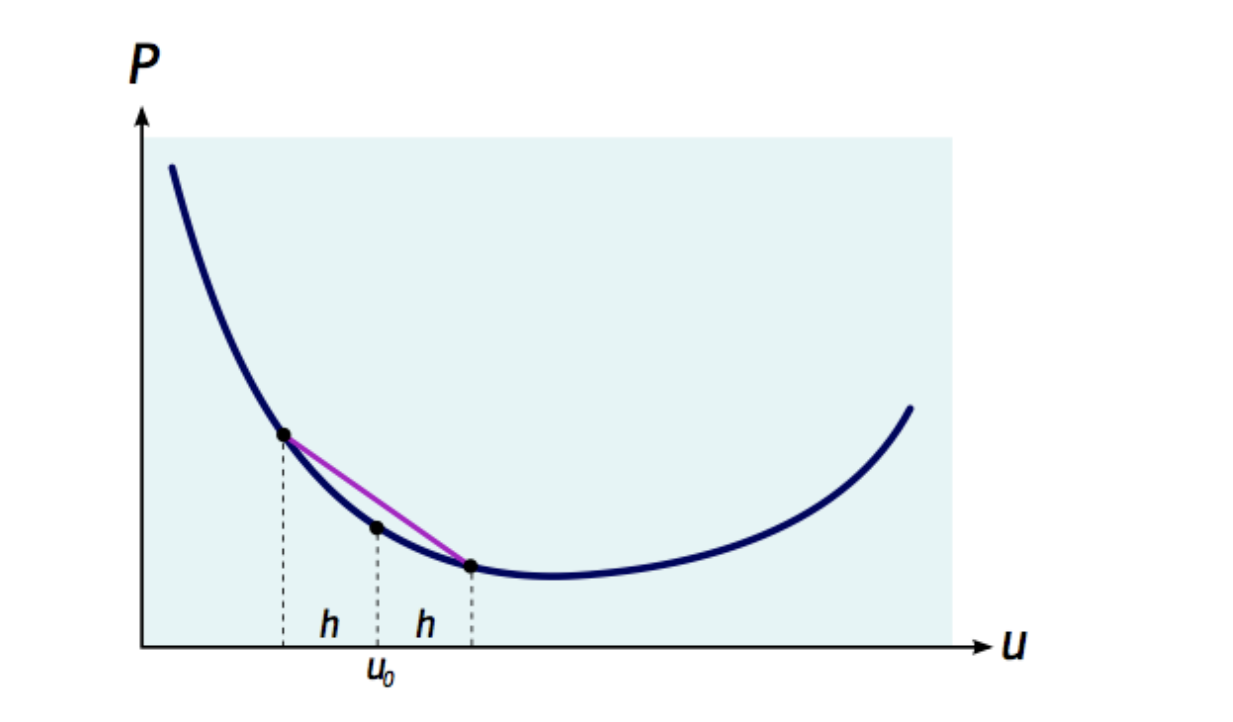
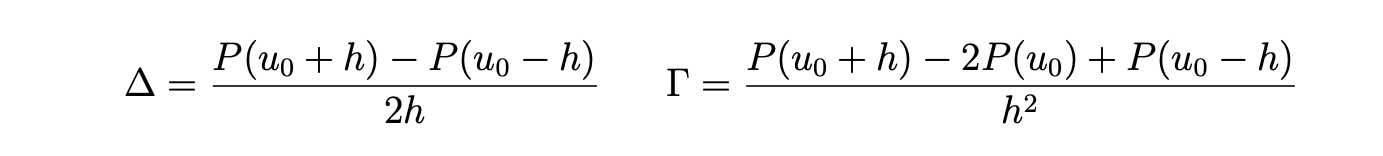

In [37]:
u0 = u.value() ; h = 0.01
P0 = option.NPV() ; print(P0)

1.3657980739109867


In [38]:
u.setValue(u0+h)
P_plus = option.NPV() ; print(P_plus)

1.3688112201958083


In [39]:
u.setValue(u0-h)
P_minus = option.NPV() ; print(P_minus)

1.3627900998610207


In [42]:
u.setValue(u0)

In [44]:
Delta = (P_plus - P_minus)/(2*h)
Gamma = (P_plus - 2*P0 + P_minus)/(h*h) 
print(Delta)
print(Gamma)

0.3010560167393761
0.05172234855521651


#### Two-sided formula
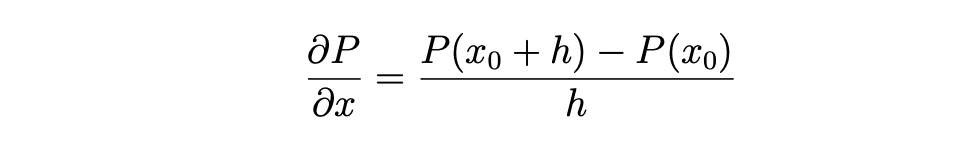

In [46]:
r0 = r.value()  
h = 0.0001 
r.setValue(r0+h)
P_plus = option.NPV() 
r.setValue(r0)
Rho = (P_plus - P0)/h 
print(Rho)

6.531038494277386


In [48]:
sigma0 = sigma.value() 
h = 0.0001 
sigma.setValue(sigma0+h)
P_plus = option.NPV() 
sigma.setValue(sigma0)
Vega = (P_plus - P0)/h ; print(Vega)

26.52519924198904


In [49]:
Settings.instance().evaluationDate = today+1
P1 = option.NPV()
h = 1.0/365
Theta = (P1-P0)/h ; print(Theta)

-10.770888399441302
